# **Imports**

In [ ]:
pip install praw

     |████████████████████████████████| 176 kB 4.3 MB/s 
     |████████████████████████████████| 52 kB 1.0 MB/s 


In [ ]:
pip install emoji

     |████████████████████████████████| 170 kB 4.1 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=f799f8f73e123b5272288e0772a7abad48d0c8914c2b045b697cf1584ecf246d
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
# Gathering data from Reddit
import praw
import pandas as pd
from praw.models import MoreComments
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
import emoji
import re
import en_core_web_sm
import spacy

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Create a connection with Reddit API
reddit = praw.Reddit(client_id='Y-Y649Cy98Yhjath5aTPUg',
                     client_secret='wliKxxthUO-6eDBpodNzb0yK_eSQNQ',
                     user_agent='ua')

In [ ]:
# Getting submissions from target subreddit
ids = []
subreddit = reddit.subreddit('BannedFromThe_Donald')
for submission in subreddit.hot(limit=20000):
  #print(submission.title)
  #print('Submission ID = ', submission.id, '\n')
  ids.append(submission.id)

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

In [ ]:
# download data from banned/deleted subreddits
# they are r/donaldtrump, r/The_Donald

In [ ]:
comments_raw = []
for id_ in ids:
  post = reddit.submission(id=id_)

  # getting raw comments from the given submission
  post.comments.replace_more(limit=None)
  for comments in post.comments.list():
    comments_raw.append(comments.body)

print('Total Comments Scraped = ', (len(comments_raw)))

Streaming output truncated to the last 5000 lines.
It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly rec

Total Comments Scraped =  20066


In [ ]:
def data_preprocess(comments_raw):
  list1 = comments_raw
  list1 = [str(i) for i in list1]  # map to a list of strings
  string_uncleaned = ' , '.join(list1)  # join all the strings seperated by a comma
  print('Original length = ', len(string_uncleaned))

  # remove emojis from the comments
  string_emojiless = emoji.get_emoji_regexp().sub(u'', string_uncleaned)
  print("removing emojis done")

  # tokenizing and cleaning string
  tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
  string_tokenized = tokenizer.tokenize(string_emojiless)
  print("tokenizing done")

  # convert tokens to lowercase
  string_tokenized_lower = [word.lower() for word in string_tokenized]
  print("lowercasing done")

  # remove stopwords
  nlp = en_core_web_sm.load()
  stopwords = nlp.Defaults.stop_words
  tokens_without_sw = [word for word in string_tokenized_lower if not word in stopwords]
  print("removing stopwords done")

  # lemmatizing
  lemmatizer = WordNetLemmatizer()
  tokens_lemmatized = ([lemmatizer.lemmatize(w) for w in tokens_without_sw])
  print("lemmatizing done")

  return tokens_lemmatized

In [ ]:
output = data_preprocess(comments_raw)
print('Length of output = ', len(output))

Original length =  3669689
removing emojis done
tokenizing done
lowercasing done
removing stopwords done
lemmatizing done
Length of output =  322144


In [ ]:
for i in range(0,32):
  if i < 31: 
    substring = output[i*10000 : (i+1)*10000]
  else:
    substring = output[i*10000 : -1]

# **Test Data**

In [ ]:
post1 = reddit.submission(id='hi51tm')

In [ ]:
# getting raw comments from the given submission
comments_raw_test = []
post.comments.replace_more(limit=None)
for comments in post.comments.list():
  comments_raw_test.append(comments.body)

print(comments_raw_test, '\n')
print('Total Comments Scraped = ', (len(comments_raw_test)))

['Oh boy looks like we pissed off some T_D special snowflakes! 161 reports!   \nuser reports:  \n32: Spam.  \n20: No brigading  \n17: Threatening, harassing, or inciting violence  \n11: This is not r/TD, please remain civil  \n10: <no reason>  \n5: Threatens, harrasses, or bullies  \n4: Voting Manipulation  \n3: Vote manipulation  \n3: vote manipulation  \n2: Breaking reddit  \n2: Threatens, harasses, or bullies  \n2: breaking reddit  \n1: jesus christ why are you using the same techniques that t_d uses. You make us look as bad as them  \n1: Dangerous sodium levels, someone put OP on suicide watch  \n1: Nice use of bots / admins on the site manually manipulating votes.  \n1: how many fucking subreddits do i need to block before i finally escape this political bullshit  \n1: Yet another superfluous shitpost sub  \n1: Holy shit another one of you subs? Reddit was a mistake  \n1: You guys sure hate women :(  \n1: STOP MAKING SUBS YOU FUCKING FAGGOTS DRINK BLEACH I HATE YOU GO FUCK YOURSEL

# **Data Preprocessing**

In [ ]:
list1 = comments_raw_test
list1 = [str(i) for i in list1]  # map to a list of strings
string_uncleaned = ' , '.join(list1)  # join all the strings seperated by a comma
string_uncleaned

'Oh boy looks like we pissed off some T_D special snowflakes! 161 reports!   \nuser reports:  \n32: Spam.  \n20: No brigading  \n17: Threatening, harassing, or inciting violence  \n11: This is not r/TD, please remain civil  \n10: <no reason>  \n5: Threatens, harrasses, or bullies  \n4: Voting Manipulation  \n3: Vote manipulation  \n3: vote manipulation  \n2: Breaking reddit  \n2: Threatens, harasses, or bullies  \n2: breaking reddit  \n1: jesus christ why are you using the same techniques that t_d uses. You make us look as bad as them  \n1: Dangerous sodium levels, someone put OP on suicide watch  \n1: Nice use of bots / admins on the site manually manipulating votes.  \n1: how many fucking subreddits do i need to block before i finally escape this political bullshit  \n1: Yet another superfluous shitpost sub  \n1: Holy shit another one of you subs? Reddit was a mistake  \n1: You guys sure hate women :(  \n1: STOP MAKING SUBS YOU FUCKING FAGGOTS DRINK BLEACH I HATE YOU GO FUCK YOURSELV

In [ ]:
# remove emojis from the comments
string_emojiless = emoji.get_emoji_regexp().sub(u'', string_uncleaned)

In [ ]:
# tokenizing and cleaning string
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
string_tokenized = tokenizer.tokenize(string_emojiless)
print(string_tokenized)

['Oh', 'boy', 'looks', 'like', 'we', 'pissed', 'off', 'some', 'T_D', 'special', 'snowflakes', '161', 'reports', 'user', 'reports', '32', 'Spam', '20', 'No', 'brigading', '17', 'Threatening', 'harassing', 'or', 'inciting', 'violence', '11', 'This', 'is', 'not', 'r', 'TD', 'please', 'remain', 'civil', '10', 'no', 'reason', '5', 'Threatens', 'harrasses', 'or', 'bullies', '4', 'Voting', 'Manipulation', '3', 'Vote', 'manipulation', '3', 'vote', 'manipulation', '2', 'Breaking', 'reddit', '2', 'Threatens', 'harasses', 'or', 'bullies', '2', 'breaking', 'reddit', '1', 'jesus', 'christ', 'why', 'are', 'you', 'using', 'the', 'same', 'techniques', 'that', 't_d', 'uses', 'You', 'make', 'us', 'look', 'as', 'bad', 'as', 'them', '1', 'Dangerous', 'sodium', 'levels', 'someone', 'put', 'OP', 'on', 'suicide', 'watch', '1', 'Nice', 'use', 'of', 'bots', 'admins', 'on', 'the', 'site', 'manually', 'manipulating', 'votes', '1', 'how', 'many', 'fucking', 'subreddits', 'do', 'i', 'need', 'to', 'block', 'before'

In [ ]:
# convert tokens to lowercase
string_tokenized_lower = [word.lower() for word in string_tokenized]
print(string_tokenized_lower)

['oh', 'boy', 'looks', 'like', 'we', 'pissed', 'off', 'some', 't_d', 'special', 'snowflakes', '161', 'reports', 'user', 'reports', '32', 'spam', '20', 'no', 'brigading', '17', 'threatening', 'harassing', 'or', 'inciting', 'violence', '11', 'this', 'is', 'not', 'r', 'td', 'please', 'remain', 'civil', '10', 'no', 'reason', '5', 'threatens', 'harrasses', 'or', 'bullies', '4', 'voting', 'manipulation', '3', 'vote', 'manipulation', '3', 'vote', 'manipulation', '2', 'breaking', 'reddit', '2', 'threatens', 'harasses', 'or', 'bullies', '2', 'breaking', 'reddit', '1', 'jesus', 'christ', 'why', 'are', 'you', 'using', 'the', 'same', 'techniques', 'that', 't_d', 'uses', 'you', 'make', 'us', 'look', 'as', 'bad', 'as', 'them', '1', 'dangerous', 'sodium', 'levels', 'someone', 'put', 'op', 'on', 'suicide', 'watch', '1', 'nice', 'use', 'of', 'bots', 'admins', 'on', 'the', 'site', 'manually', 'manipulating', 'votes', '1', 'how', 'many', 'fucking', 'subreddits', 'do', 'i', 'need', 'to', 'block', 'before'

In [ ]:
# remove stopwords
nlp = en_core_web_sm.load()
stopwords = nlp.Defaults.stop_words

tokens_without_sw = [word for word in string_tokenized_lower if not word in stopwords]
print(tokens_without_sw)

['oh', 'boy', 'looks', 'like', 'pissed', 't_d', 'special', 'snowflakes', '161', 'reports', 'user', 'reports', '32', 'spam', '20', 'brigading', '17', 'threatening', 'harassing', 'inciting', 'violence', '11', 'r', 'td', 'remain', 'civil', '10', 'reason', '5', 'threatens', 'harrasses', 'bullies', '4', 'voting', 'manipulation', '3', 'vote', 'manipulation', '3', 'vote', 'manipulation', '2', 'breaking', 'reddit', '2', 'threatens', 'harasses', 'bullies', '2', 'breaking', 'reddit', '1', 'jesus', 'christ', 'techniques', 't_d', 'uses', 'look', 'bad', '1', 'dangerous', 'sodium', 'levels', 'op', 'suicide', 'watch', '1', 'nice', 'use', 'bots', 'admins', 'site', 'manually', 'manipulating', 'votes', '1', 'fucking', 'subreddits', 'need', 'block', 'finally', 'escape', 'political', 'bullshit', '1', 'superfluous', 'shitpost', 'sub', '1', 'holy', 'shit', 'subs', 'reddit', 'mistake', '1', 'guys', 'sure', 'hate', 'women', '1', 'stop', 'making', 'subs', 'fucking', 'faggots', 'drink', 'bleach', 'hate', 'fuck'

In [ ]:
# Normalization

# lemmatizing
lemmatizer = WordNetLemmatizer()
tokens_lemmatized = ([lemmatizer.lemmatize(w) for w in tokens_without_sw])
print(tokens_lemmatized)

# stemming
stemmer = PorterStemmer()
tokens_stemmed = ([stemmer.stem(s) for s in tokens_without_sw])
print(tokens_stemmed)

['oh', 'boy', 'look', 'like', 'pissed', 't_d', 'special', 'snowflake', '161', 'report', 'user', 'report', '32', 'spam', '20', 'brigading', '17', 'threatening', 'harassing', 'inciting', 'violence', '11', 'r', 'td', 'remain', 'civil', '10', 'reason', '5', 'threatens', 'harrasses', 'bully', '4', 'voting', 'manipulation', '3', 'vote', 'manipulation', '3', 'vote', 'manipulation', '2', 'breaking', 'reddit', '2', 'threatens', 'harasses', 'bully', '2', 'breaking', 'reddit', '1', 'jesus', 'christ', 'technique', 't_d', 'us', 'look', 'bad', '1', 'dangerous', 'sodium', 'level', 'op', 'suicide', 'watch', '1', 'nice', 'use', 'bot', 'admins', 'site', 'manually', 'manipulating', 'vote', '1', 'fucking', 'subreddits', 'need', 'block', 'finally', 'escape', 'political', 'bullshit', '1', 'superfluous', 'shitpost', 'sub', '1', 'holy', 'shit', 'sub', 'reddit', 'mistake', '1', 'guy', 'sure', 'hate', 'woman', '1', 'stop', 'making', 'sub', 'fucking', 'faggot', 'drink', 'bleach', 'hate', 'fuck', 'motherfucker', 

In [ ]:
output = tokens_lemmatized
print('Original length = ', len(string_uncleaned))
print('Length of output = ', len(output))

Original length =  321041
Length of output =  28056


# **Apply Sentiment Analyzer**

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# polarity score
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for s in output:
  score = sia.polarity_scores(s)
  score['words'] = s
  results.append(score)

pd.set_option('display.max_columns', None, 'max_colwidth', None)
df = pd.DataFrame.from_records(results)
df

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,neg,neu,pos,compound,words
0,0.0,0.0,0.0,0.0000,r
1,0.0,1.0,0.0,0.0000,the_donald
2,0.0,0.0,1.0,0.3400,excited
3,0.0,1.0,0.0,0.0000,president
4,0.0,1.0,0.0,0.0000,actually
...,...,...,...,...,...
322139,0.0,1.0,0.0,0.0000,deleted
322140,1.0,0.0,0.0,-0.1027,nah
322141,0.0,0.0,0.0,0.0000,m
322142,0.0,1.0,0.0,0.0000,seeing


In [ ]:
# add label for each word
df['label'] = 0
df.loc[df['compound'] > 0.10, 'label'] = 1 # (postive entries)
df.loc[df['compound'] < -0.10, 'label'] = -1 # (negative entries)
df.head()

,neg,neu,pos,compound,words,label
0,0.0,0.0,0.0,0.00,r,0
1,0.0,1.0,0.0,0.00,the_donald,0
2,0.0,0.0,1.0,0.34,excited,1
3,0.0,1.0,0.0,0.00,president,0
4,0.0,1.0,0.0,0.00,actually,0


In [ ]:
# label counts
print(df.label.value_counts())

 0    261198
-1     33754
 1     27192
Name: label, dtype: int64


# **Representation Of Sentiment**

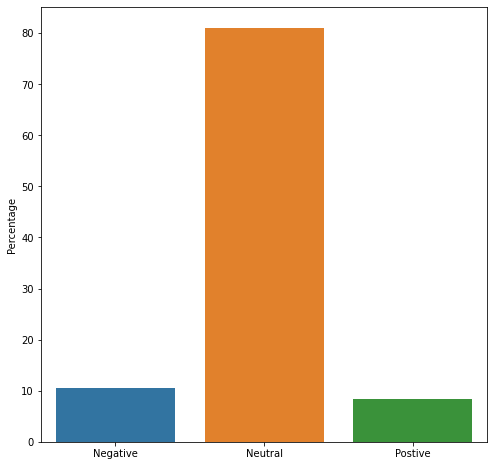

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Postive'])
ax.set_ylabel('Percentage')

plt.show()

In [ ]:
df_without_neatral = df.loc[df['label'] != 0]
df_without_neatral.head()

,neg,neu,pos,compound,words,label
2,0.0,0.0,1.0,0.3400,excited,1
6,1.0,0.0,0.0,-0.5719,anger,-1
7,0.0,0.0,1.0,0.3182,fan,1
10,0.0,0.0,1.0,0.5994,beautiful,1
12,0.0,0.0,1.0,0.4404,good,1


In [ ]:
print(df_without_neatral.label.value_counts())

-1    33754
 1    27192
Name: label, dtype: int64


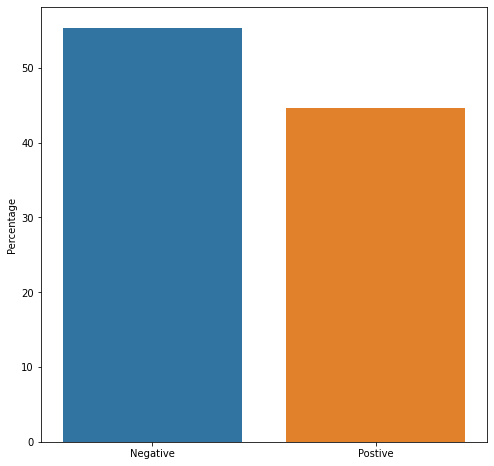

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
counts = df_without_neatral.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Postive'])
ax.set_ylabel('Percentage')

plt.show()

# **Most Common Postive/Negative Words**

In [ ]:
words_pos = list(df.loc[df['label'] == 1].words) 
words_neg = list(df.loc[df['label'] == -1].words) 

freq_pos = FreqDist(words_pos).most_common(50)
freq_neg = FreqDist(words_neg).most_common(50)

freq_pos

[('like', 2911),
 ('supporter', 920),
 ('good', 764),
 ('lol', 604),
 ('yeah', 535),
 ('sure', 502),
 ('better', 472),
 ('pretty', 427),
 ('won', 418),
 ('care', 413),
 ('yes', 411),
 ('support', 377),
 ('party', 363),
 ('agree', 332),
 ('love', 329),
 ('free', 327),
 ('true', 307),
 ('kind', 267),
 ('win', 265),
 ('great', 264),
 ('np', 249),
 ('help', 239),
 ('safe', 229),
 ('funny', 216),
 ('best', 215),
 ('ok', 214),
 ('joke', 208),
 ('hope', 206),
 ('god', 205),
 ('nice', 203),
 ('thanks', 179),
 ('truth', 169),
 ('fun', 169),
 ('clearly', 160),
 ('hand', 154),
 ('friend', 153),
 ('united', 152),
 ('okay', 152),
 ('thank', 150),
 ('wow', 145),
 ('honestly', 144),
 ('definitely', 142),
 ('rich', 123),
 ('important', 120),
 ('fine', 119),
 ('lmao', 116),
 ('wish', 115),
 ('play', 111),
 ('supporting', 111),
 ('fair', 109)]

In [ ]:
# Bar chart for most common postive/negative words
import plotly.express as px

pos_df = pd.DataFrame(freq_pos)
pos_df = pos_df.rename(columns = {0: '50 Most Frequent Positive Words', 1: 'Count'}, inplace = False)

fig = px.bar(pos_df, x = '50 Most Frequent Positive Words', y = 'Count', title = 'Positive Words Ranked by Frequency')
fig.show()

In [ ]:
neg_df = pd.DataFrame(freq_neg)
neg_df = neg_df.rename(columns = {0: '50 Most Frequent Negative Words', 1: 'Count'}, inplace = False)

fig = px.bar(neg_df, x = '50 Most Frequent Negative Words', y = 'Count', title = 'Negative Words Ranked by Frequency')
fig.show()

In [ ]:
# install detoxify  

!pip install detoxify

In [ ]:
from detoxify import Detoxify

# each model takes in either a string or a list of strings

results = Detoxify('original').predict(output)

#results = Detoxify('unbiased').predict(['example text 1','example text 2'])

print(pd.DataFrame(results, index=input_text).round(5))

Downloading: "https://github.com/unitaryai/detoxify/releases/download/v0.1-alpha/toxic_original-c1212f89.ckpt" to /root/.cache/torch/hub/checkpoints/toxic_original-c1212f89.ckpt


  0%|          | 0.00/418M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]